<a href="https://www.kaggle.com/code/aniketgaudgaul/total-quality-of-life?scriptVersionId=102894268" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quality-of-life-in-a-country-comparison/Quality of life in a country comparison.csv


In [2]:
dataframe = pd.read_csv("../input/quality-of-life-in-a-country-comparison/Quality of life in a country comparison.csv")
dataframe

,Unnamed: 0,Rank,Country,Stability(15%),Rights(20%),Health(15%),Safety(10%),Climate(15%),Costs(15%),Popularity(10%),TotalQuality of life(100%)
0,0,1,Australia,86,92,87,100,90,23,41,76
1,1,2,San Marino,81,82,91,87,62,61,47,74
2,2,3,Hong Kong,77,85,100,97,49,61,41,74
3,3,4,Switzerland,91,99,93,99,34,44,46,74
4,4,5,Macao,90,71,100,93,48,61,44,73
...,...,...,...,...,...,...,...,...,...,...,...
132,132,133,Cameroon,40,19,9,27,60,51,34,34
133,133,134,Nigeria,18,24,12,23,53,57,41,32
134,134,135,Chad,46,12,0,31,50,49,44,32
135,135,136,Sudan,8,11,18,55,40,66,24,30


In [3]:
dataframe = dataframe.drop(["Rank", "Country", "Unnamed: 0"],axis=1)
dataframe

,Stability(15%),Rights(20%),Health(15%),Safety(10%),Climate(15%),Costs(15%),Popularity(10%),TotalQuality of life(100%)
0,86,92,87,100,90,23,41,76
1,81,82,91,87,62,61,47,74
2,77,85,100,97,49,61,41,74
3,91,99,93,99,34,44,46,74
4,90,71,100,93,48,61,44,73
...,...,...,...,...,...,...,...,...
132,40,19,9,27,60,51,34,34
133,18,24,12,23,53,57,41,32
134,46,12,0,31,50,49,44,32
135,8,11,18,55,40,66,24,30


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Stability(15%)              137 non-null    int64
 1   Rights(20%)                 137 non-null    int64
 2   Health(15%)                 137 non-null    int64
 3   Safety(10%)                 137 non-null    int64
 4   Climate(15%)                137 non-null    int64
 5   Costs(15%)                  137 non-null    int64
 6   Popularity(10%)             137 non-null    int64
 7   TotalQuality of life(100%)  137 non-null    int64
dtypes: int64(8)
memory usage: 8.7 KB


In [5]:
co_mat = dataframe.corr()
co_mat['TotalQuality of life(100%)'].sort_values(ascending=False)

TotalQuality of life(100%)    1.000000
Rights(20%)                   0.895649
Health(15%)                   0.861517
Stability(15%)                0.858164
Safety(10%)                   0.763213
Popularity(10%)               0.192992
Climate(15%)                 -0.260525
Costs(15%)                   -0.356321
Name: TotalQuality of life(100%), dtype: float64

array([[<AxesSubplot:xlabel='TotalQuality of life(100%)', ylabel='TotalQuality of life(100%)'>,
        <AxesSubplot:xlabel='Stability(15%)', ylabel='TotalQuality of life(100%)'>,
        <AxesSubplot:xlabel='Rights(20%)', ylabel='TotalQuality of life(100%)'>,
        <AxesSubplot:xlabel='Health(15%)', ylabel='TotalQuality of life(100%)'>,
        <AxesSubplot:xlabel='Costs(15%)', ylabel='TotalQuality of life(100%)'>,
        <AxesSubplot:xlabel='Climate(15%)', ylabel='TotalQuality of life(100%)'>],
       [<AxesSubplot:xlabel='TotalQuality of life(100%)', ylabel='Stability(15%)'>,
        <AxesSubplot:xlabel='Stability(15%)', ylabel='Stability(15%)'>,
        <AxesSubplot:xlabel='Rights(20%)', ylabel='Stability(15%)'>,
        <AxesSubplot:xlabel='Health(15%)', ylabel='Stability(15%)'>,
        <AxesSubplot:xlabel='Costs(15%)', ylabel='Stability(15%)'>,
        <AxesSubplot:xlabel='Climate(15%)', ylabel='Stability(15%)'>],
       [<AxesSubplot:xlabel='TotalQuality of life(100%)', ylab

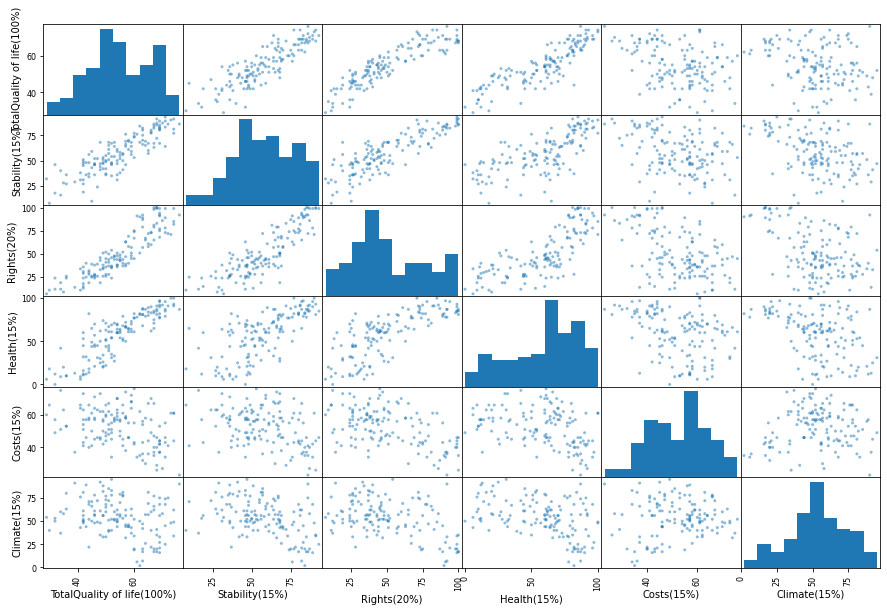

In [6]:
from pandas.plotting import scatter_matrix
attributes = ["TotalQuality of life(100%)", "Stability(15%)", "Rights(20%)", "Health(15%)", "Costs(15%)", "Climate(15%)"]
scatter_matrix(dataframe[attributes], figsize = (15,10))

In [7]:
from sklearn.model_selection import train_test_split
x = dataframe.iloc[:,0:7]
y = dataframe.iloc[:,7]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f"Rows in train set: {len(x_train)}\nRows in test set: {len(x_test)}\n")

Rows in train set: 109
Rows in test set: 28



In [8]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [9]:
from sklearn.metrics import mean_squared_error

predictions = LR.predict(x_train)

mse = mean_squared_error(y_train,predictions)

rmse = np.sqrt(mse)

In [10]:
rmse

0.2967312694237181

In [11]:
from sklearn.metrics import mean_squared_error

predictions = LR.predict(x_test)

mse2 = mean_squared_error(y_test,predictions)

rmse2 = np.sqrt(mse2)

In [12]:
rmse2

0.3170133231426403

In [13]:
array = np.array([[7,12,15,56,38,68,22]])
p = LR.predict(array)
p

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([29.27250615])

In [14]:
import tensorflow as tf

In [15]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation = "relu"),
    tf.keras.layers.Dense(36, activation = "relu"),
#     tf.keras.layers.Dense(12, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "relu")

])

2022-08-09 13:25:36.072606: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
model.compile(loss = 'mse',
              optimizer = 'adam',
             metrics = ['mse']
             )

In [17]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [18]:
type(x_train)

numpy.ndarray

In [19]:
model.fit(x_train, y_train, epochs =500)

2022-08-09 13:25:36.499904: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
4/4 [==============================] - 1s 9ms/step - loss: 3034.3967 - mse: 3034.3967
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 2989.6138 - mse: 2989.6138
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 2942.0874 - mse: 2942.0874
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 2872.1509 - mse: 2872.1509
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 2782.0613 - mse: 2782.0613
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 2670.1465 - mse: 2670.1465
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 2533.8508 - mse: 2533.8508
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 2375.2419 - mse: 2375.2419
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 2207.8960 - mse: 2207.8960
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 2026.6426 - mse: 2026.6426
Epoch 11/500
4/4 [=

In [20]:
model.predict([[7,12,15,56,38,68,22]])

array([[30.571016]], dtype=float32)